In [ ]:
!pip install unrar
!unrar x /content/Indonesia_Kab_Kota.rar -y


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/Indonesia_Kab_Kota.rar

Extracting  SHP/Indo_Kab_Kot.cpg                                           0%  OK 
Extracting  SHP/Indo_Kab_Kot.dbf                                           0%  OK 
Extracting  SHP/Indo_Kab_Kot.prj                                           0%  OK 
Extracting  SHP/Indo_Kab_Kot.sbn                                           0%  OK 
Extracting  SHP/Indo_Kab_Kot.sbx                                           0%  OK 
Extracting  SHP/Indo_Kab_Kot.shp                                           0%  1%  2%  3%  4%  5%  6%  7%  8%  9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 29% 30% 31% 32% 33% 34% 35% 36% 37% 38% 39% 40% 41% 42% 

In [ ]:
!pip install geopandas

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
map = gpd.read_file('/content/SHP/Indo_Kab_Kot.shp')

In [ ]:
cond = map['PROVINSI'] == 'DKI JAKARTA'
jakarta_map = map[cond]
cond = jakarta_map[cond]['KABKOT'] != 'KEPULAUAN SERIBU'
jakarta_map = jakarta_map[cond]

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1299: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1299: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


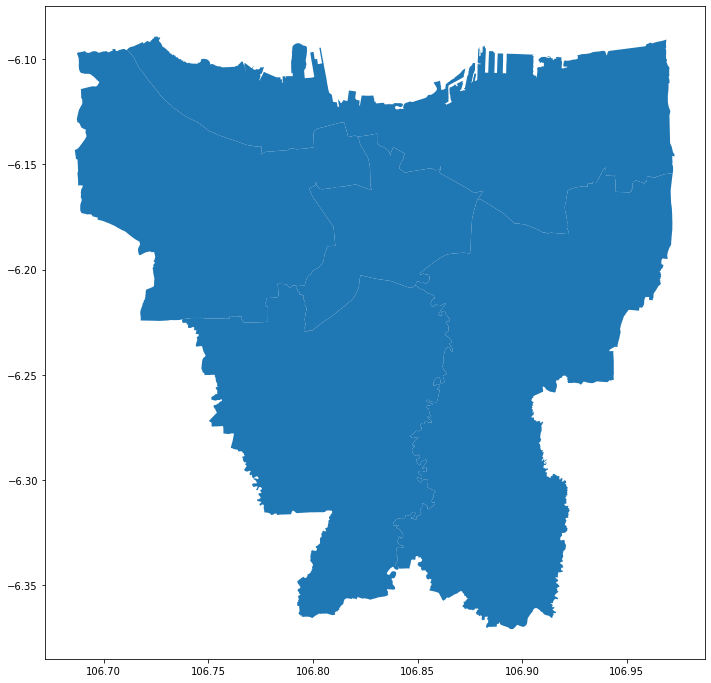

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 12))
jakarta_map[cond].plot(ax=ax)
plt.show()

In [ ]:
jakarta_map['KABKOT'] = jakarta_map['KABKOT'].apply(str.lower)
jakarta_map

,PROVNO,KABKOTNO,PROVINSI,KABKOT,geometry
160,31,71,DKI JAKARTA,jakarta selatan,"POLYGON Z ((106.83399 -6.20492 0.00000, 106.83..."
161,31,72,DKI JAKARTA,jakarta timur,"POLYGON Z ((106.94011 -6.15492 0.00000, 106.94..."
162,31,73,DKI JAKARTA,jakarta pusat,"POLYGON Z ((106.83247 -6.14138 0.00000, 106.83..."
163,31,74,DKI JAKARTA,jakarta barat,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71..."
164,31,75,DKI JAKARTA,jakarta utara,"POLYGON Z ((106.72568 -6.08938 0.00000, 106.72..."


In [ ]:
df = pd.read_csv('./data-jumlah-hotel-berbintang-dan-non-bintang-jakarta-tahun-2020.csv')
df

,nama_usaha,jenis,golongan,jumlah_kamar,alamat,wilayah
0,CIPUTRA,Hotel Bintang,Bintang 4,333,Jl. Letjend S. Parman,Jakarta Barat
1,GRAND TROPIC SUITES HOTEL,Hotel Bintang,Bintang 4,195,Jl. Letjen S. Parman Kav. 3 RT. 007/02,Jakarta Barat
2,MENARA PENINSULA,Hotel Bintang,Bintang 4,400,Jl. Letjen S. Parman 78,Jakarta Barat
3,HOTEL SANTIKA PREMIERE JAKARTA,Hotel Bintang,Bintang 4,275,Jl. Aipda KS. Tubun No. 7,Jakarta Barat
4,TWIN PLAZA,Hotel Bintang,Bintang 4,211,Jl. Letjen S. Parman Kav. 93-94,Jakarta Barat
...,...,...,...,...,...,...
421,HOLIDAY INN JAKARTA KEMAYORAN,Hotel Bintang,Bintang,257,Kompleks Rukan Puri Mutiara Blok D No. 107-108...,Jakarta Utara
422,IBIS STYLE HOTEL MANGGA DUA SQUARE-JAKARTA,Hotel Bintang,Bintang,210,"Mangga Dua Square 2nd Floor, P2 Jl. Gunung Sah...",Jakarta Utara
423,SANTIKA KELAPA GADING,Hotel Bintang,Bintang,151,Jl. Raya Kelapa Nias Blok. HF 3 Sport Mall,Jakarta Utara
424,OZONE HOTEL,Hotel Melati,Melati 3,98,Jl. Pantai Indah Utara III PIK,Jakarta Utara


In [ ]:
df['jenis'] = df['jenis'].apply(str.strip).apply(str.lower)
df['jenis'].unique()

array(['hotel bintang', 'hotel melati', 'motel', 'hotel', 'hunian wisata'],
      dtype=object)

In [ ]:
df['wilayah'] = df['wilayah'].apply(str.lower)
df['wilayah'].unique()

array(['jakarta barat', 'jakarta pusat', 'jakarta selatan',
       'jakarta timur', 'jakarta utara'], dtype=object)

In [ ]:
grouped_by_city_and_type = df.groupby(['jenis', 'wilayah'], as_index=False).count()
grouped_by_city = df.groupby('wilayah', as_index=False).count()

In [ ]:
grouped_by_city_and_type_joined = grouped_by_city_and_type.merge(jakarta_map, left_on='wilayah', right_on='KABKOT')
grouped_by_city_and_type_joined['jumlah_hotel'] = grouped_by_city_and_type_joined['nama_usaha']
grouped_by_city_and_type_joined = grouped_by_city_and_type_joined[['jenis', 'wilayah', 'jumlah_hotel', 'geometry']]
grouped_by_city_and_type_joined

,jenis,wilayah,jumlah_hotel,geometry
0,hotel,jakarta barat,2,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71..."
1,hotel bintang,jakarta barat,40,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71..."
2,hotel melati,jakarta barat,46,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71..."
3,motel,jakarta barat,5,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71..."
4,hotel,jakarta selatan,3,"POLYGON Z ((106.83399 -6.20492 0.00000, 106.83..."
5,hotel bintang,jakarta selatan,46,"POLYGON Z ((106.83399 -6.20492 0.00000, 106.83..."
6,hotel melati,jakarta selatan,22,"POLYGON Z ((106.83399 -6.20492 0.00000, 106.83..."
7,hunian wisata,jakarta selatan,20,"POLYGON Z ((106.83399 -6.20492 0.00000, 106.83..."
8,motel,jakarta selatan,1,"POLYGON Z ((106.83399 -6.20492 0.00000, 106.83..."
9,hotel,jakarta timur,1,"POLYGON Z ((106.94011 -6.15492 0.00000, 106.94..."


In [ ]:
grouped_by_city_joined = grouped_by_city.merge(jakarta_map, left_on='wilayah', right_on='KABKOT')
grouped_by_city_joined['jumlah_hotel'] = grouped_by_city_joined['nama_usaha']
grouped_by_city_joined = grouped_by_city_joined[['wilayah', 'jumlah_hotel', 'geometry']]
grouped_by_city_joined

,wilayah,jumlah_hotel,geometry
0,jakarta barat,93,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71..."
1,jakarta pusat,161,"POLYGON Z ((106.83247 -6.14138 0.00000, 106.83..."
2,jakarta selatan,92,"POLYGON Z ((106.83399 -6.20492 0.00000, 106.83..."
3,jakarta timur,22,"POLYGON Z ((106.94011 -6.15492 0.00000, 106.94..."
4,jakarta utara,58,"POLYGON Z ((106.72568 -6.08938 0.00000, 106.72..."


In [ ]:
jenis_geo =  gpd.GeoDataFrame(grouped_by_city_and_type_joined, geometry=grouped_by_city_and_type_joined['geometry'])
jenis_geo

,jenis,wilayah,jumlah_hotel,geometry
0,hotel,jakarta barat,2,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71..."
1,hotel bintang,jakarta barat,40,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71..."
2,hotel melati,jakarta barat,46,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71..."
3,motel,jakarta barat,5,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71..."
4,hotel,jakarta selatan,3,"POLYGON Z ((106.83399 -6.20492 0.00000, 106.83..."
5,hotel bintang,jakarta selatan,46,"POLYGON Z ((106.83399 -6.20492 0.00000, 106.83..."
6,hotel melati,jakarta selatan,22,"POLYGON Z ((106.83399 -6.20492 0.00000, 106.83..."
7,hunian wisata,jakarta selatan,20,"POLYGON Z ((106.83399 -6.20492 0.00000, 106.83..."
8,motel,jakarta selatan,1,"POLYGON Z ((106.83399 -6.20492 0.00000, 106.83..."
9,hotel,jakarta timur,1,"POLYGON Z ((106.94011 -6.15492 0.00000, 106.94..."


In [ ]:
total_geo =  gpd.GeoDataFrame(grouped_by_city_joined, geometry=grouped_by_city_joined['geometry'])
total_geo

,wilayah,jumlah_hotel,geometry
0,jakarta barat,93,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71..."
1,jakarta pusat,161,"POLYGON Z ((106.83247 -6.14138 0.00000, 106.83..."
2,jakarta selatan,92,"POLYGON Z ((106.83399 -6.20492 0.00000, 106.83..."
3,jakarta timur,22,"POLYGON Z ((106.94011 -6.15492 0.00000, 106.94..."
4,jakarta utara,58,"POLYGON Z ((106.72568 -6.08938 0.00000, 106.72..."


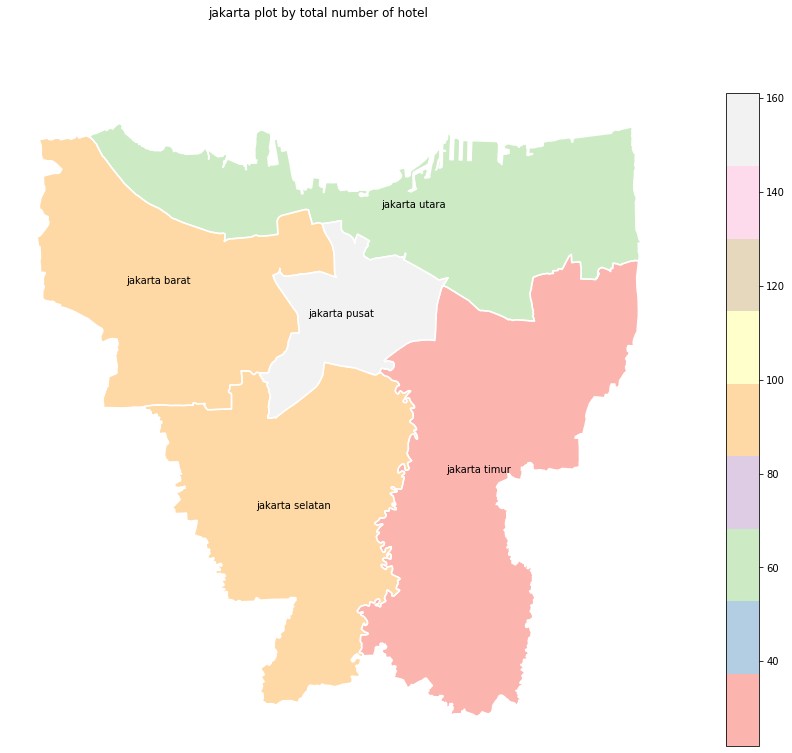

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 12))
total_geo.plot('jumlah_hotel', legend=True, ax = ax, cmap='Pastel1')
total_geo.boundary.plot(ax = ax, color = 'white')
for i, (x, y) in zip(total_geo['wilayah'], zip(total_geo.centroid.x, total_geo.centroid.y)):
  ax.annotate(i, xy = (x-0.02, y), fontsize = 10)
fig.suptitle('jakarta plot by total number of hotel')
ax.axis('off')
plt.show()

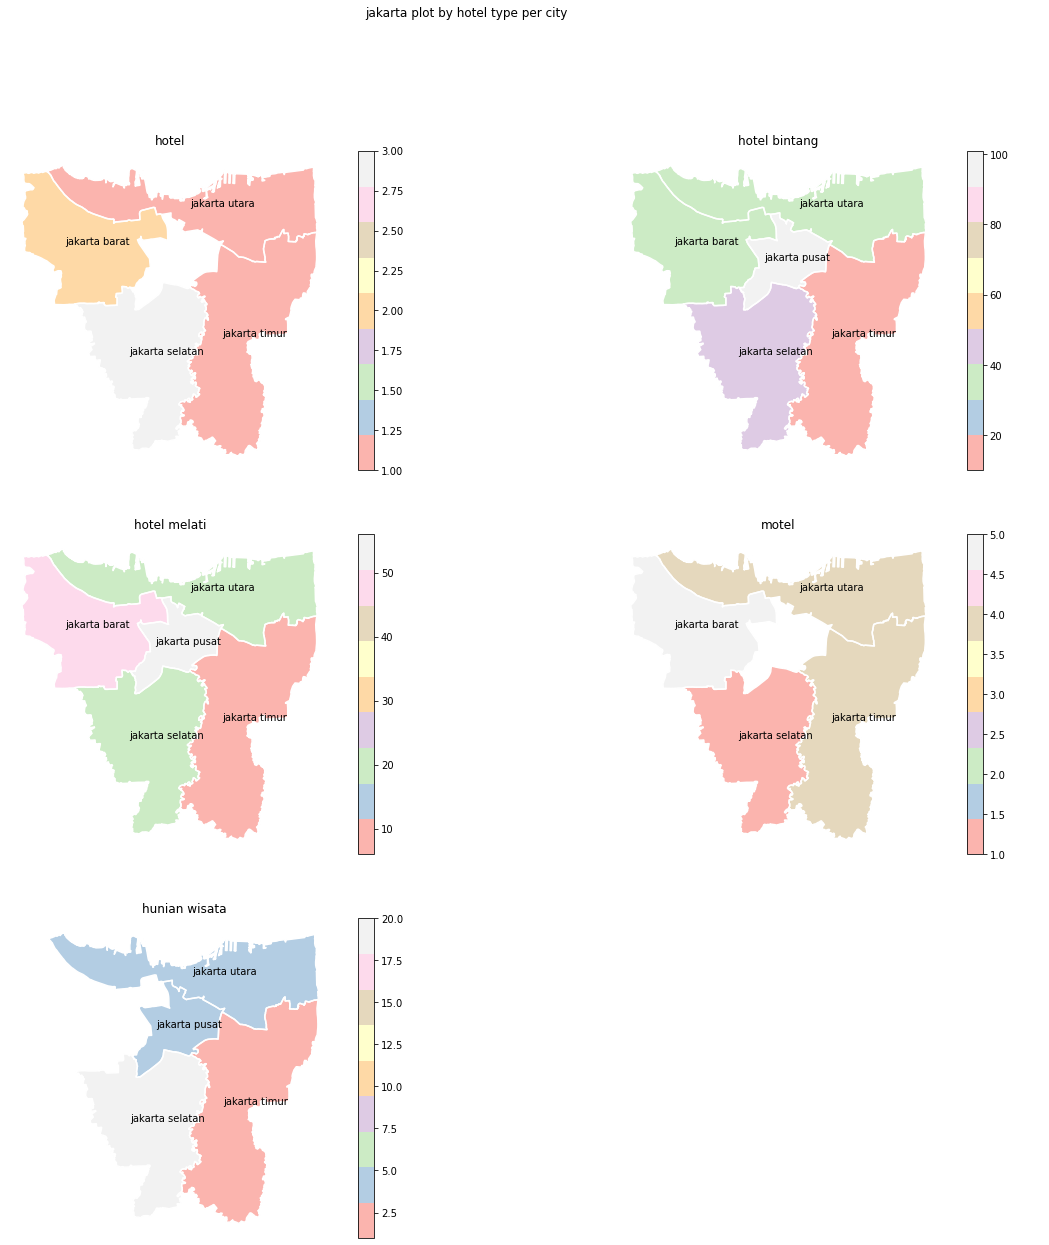

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))
n_col = 2
for count, i in enumerate(jenis_geo['jenis'].unique()):
  geo_df = jenis_geo[jenis_geo['jenis'] == i]
  geo_df.plot('jumlah_hotel', legend=True, ax = ax[count//n_col][count%n_col], cmap='Pastel1')
  geo_df.boundary.plot(ax = ax[count//n_col][count%n_col], color = 'white')
  for j, (x, y) in zip(geo_df['wilayah'], zip(geo_df.centroid.x, geo_df.centroid.y)):
    ax[count//n_col][count%n_col].annotate(j, xy = (x-0.02, y), fontsize = 10)
  ax[count//n_col][count%n_col].set_title(i)
fig.suptitle('jakarta plot by hotel type per city')
for i in range(6):
  ax[i//n_col][i%n_col].axis('off')
plt.show()